
This notebook aims to demonstrate my bridge knowledge between Ophthalmology and Computer Vision.

This is done through a code sample whose purpose is to apply filters to improve ophthalmic images.

The code below is a mere prototype without clinical validation


In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# by: Rafael_Scherer, MD, PhD
# date: 20/12/22
# version ='1.0'


In [ ]:
# Libs
from IPython.display import display, HTML
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Show Matplotlib's plots inside a Jupyter Notebook
%matplotlib inline


In [35]:
# Text params
ORG = (150, 250)
FONTFACE = cv2.FONT_HERSHEY_TRIPLEX
FONTSCALE = 3
COLOR = (0, 255, 0)
THICKNESS = 3

# Some links to relevant studies on filters applied to medical images

In [81]:
display(HTML("""<a href="https://www.sciencedirect.com/science/article/pii/S2405959521000564">
(LINK) Retinal disease identification using upgraded CLAHE filter and transfer convolution neural network (2021)</a>"""))
display(HTML("""<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8329119/">
(LINK) A Hybrid Algorithm to Enhance Colour Retinal Fundus Images Using a Wiener Filter and CLAHE (2021)</a>"""))
display(HTML("""<a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5689921/">
(LINK) Automatic x‐ray image contrast enhancement based on parameter auto‐optimization (2017)</a>"""))
display(HTML("""<a href="https://www.ijcseonline.org/pdf_paper_view.php?paper_id=5270&1-IJCSE-08433.pdf">
(LINK) A Review on Methods of Enhancement And Denoising in Retinal Fundus Images (2020)</a>"""))


In [84]:
# Functions

def clahe_bgr(image: np.ndarray, cliplimit: int =2, tilesize: int =8) -> np.ndarray:
    """
    Converts the image to LAB format and applies the CLAHE filter to the L channel
    :param image: image=numpy.ndarray (BGR)
    :param cliplimit: Sets threshold for contrast limiting (2, 3 or 4)
    :param tilesize: Sets size of grid for histogram equalization.
    :return: image=numpy.ndarray (BGR)

    >>>im = cv2.imread('samples/sample_crvo.jpg')
    >>>clahe_bgr(im)[0][0]
    """

    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    lab_p = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=cliplimit,tileGridSize=(tilesize, tilesize))
    clahed = clahe.apply(lab_p[0])
    lab = cv2.merge([clahed, lab_p[1], lab_p[2]])
    bgr = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

    cv2.imwrite(f'output/clahed.jpg', bgr)

    return bgr


def channel_bgr(image: np.ndarray, channel: str ='green') -> np.ndarray:
    """
    Selects only one of the channels from a bgr image
    :param image: image=numpy.ndarray (BGR)
    :param channel: channel ['blue', 'green', 'red']
    :return: image=numpy.ndarray

    >>>im = cv2.imread('samples/sample_crvo.jpg')
    >>>channel_bgr(im)[0][0]
    '0'
    """

    colors = ['blue', 'green', 'red']

    green = image[:,:,colors.index(channel)].astype(np.uint8)
    green = cv2.cvtColor(green, cv2.COLOR_GRAY2BGR)

    cv2.imwrite(f'output/{channel}.jpg', green)

    return green


def showimage(image1: np.ndarray, image2: np.ndarray=None, figsize: [int, int]=[15,15]) -> None:
    """
    Show images inline (BGR) and merged (horizontal)
    """
    try:
        myimage = np.concatenate((image1, image2), axis=1)
    except Exception as e:
        myimage = image1

    try:
        if myimage.ndim > 2:  #This only applies to RGB or RGBA images (e.g. not to Black and White images)
            myimage = myimage[:,:,::-1] #OpenCV follows BGR order, while matplotlib likely follows RGB order

        fig, ax = plt.subplots(figsize=figsize)
        ax.imshow(myimage, cmap = 'gray', interpolation = 'bicubic')
        plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
        plt.show()

    except Exception as e:
        return e


def text(image: np.ndarray, txt: str) -> None:
    """
    Put text on image
    """
    cv2.putText(image, txt, ORG, FONTFACE, FONTSCALE, COLOR, THICKNESS)


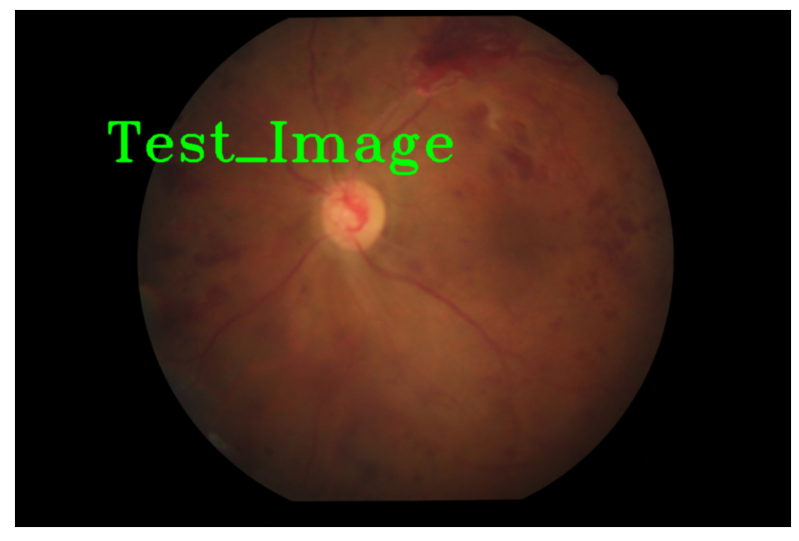

In [87]:
# Select image from samples dir
img = cv2.imread('samples/sample_crvo.jpg')
backup = img.copy()
text(backup, 'Test_Image')
showimage(backup, figsize=[10, 10])

# Enhancement filters

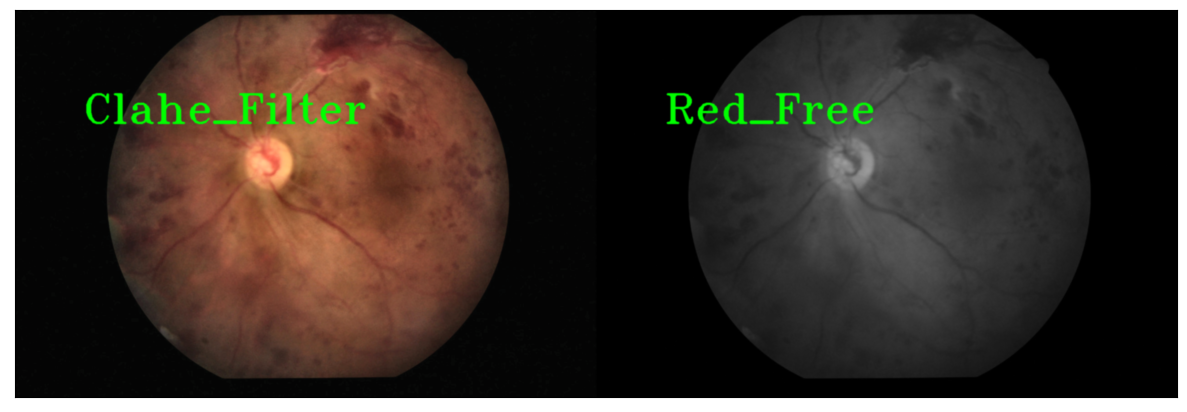

In [86]:
clahe = clahe_bgr(img)
text(clahe, 'Clahe_Filter')

redfree = channel_bgr(img)
text(redfree, 'Red_Free')

showimage(clahe, redfree)

# Deep learning applied to luminosity optimization (3rdParty optimized code implementation)

2022-12-21 00:31:10.515991: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
C:\Users\Usuario\AppData\Local\pypoetry\Cache\virtualenvs\wisconsin-r_QYjzWn-py3.10\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Some fixes were made... (Rafael Scherer)
['C:/Users/Usuario/PycharmProjects/wisconsin/samples/angio\\sample_angio.jpg']

1/1 [==============================] - 8s 8s/step
Done...


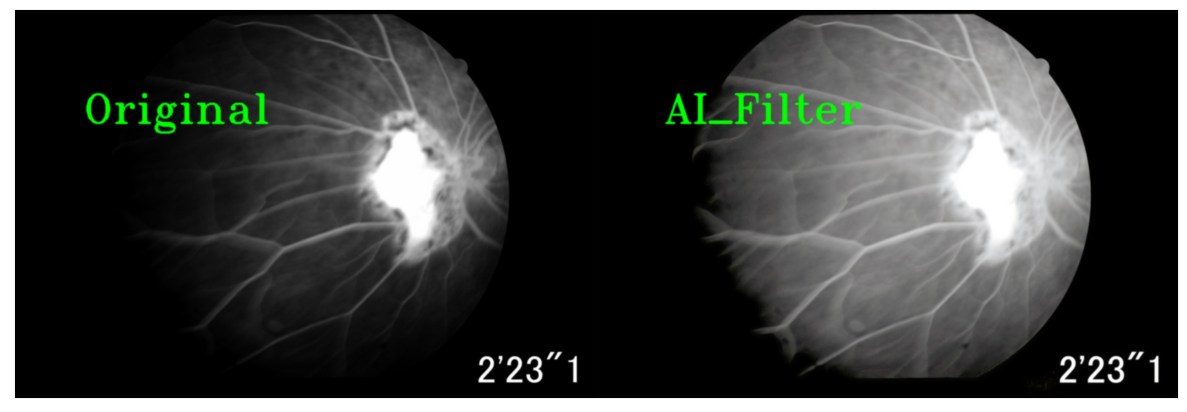

In [88]:
!python thirdparty/MBLLEN/main/test.py
# https://github.com/Lvfeifan/MBLLEN
angio = cv2.imread('samples/angio/sample_angio.jpg')
mbllen = cv2.imread('output/MBLLEN.jpg')

text(angio, 'Original')
text(mbllen, 'AI_Filter')
showimage(angio, mbllen)
